In [2]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv("movies.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [8]:
# Drop duplicates and save result back to df
df = df.drop_duplicates()

# Or alternatively, use inplace=True
# df.drop_duplicates(inplace=True)

# Display the first few rows to verify
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9568 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9568 non-null   object 
 1   YEAR      9026 non-null   object 
 2   GENRE     9490 non-null   object 
 3   RATING    8168 non-null   float64
 4   ONE-LINE  9568 non-null   object 
 5   STARS     9568 non-null   object 
 6   VOTES     8168 non-null   object 
 7   RunTime   7008 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 747.5+ KB


In [10]:
df.head(10)

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN
5,Outer Banks,(2020– ),"\nAction, Crime, Drama",7.6,\nA group of teenagers from the wrong side of ...,"\n \n Stars:\nChase Stokes, \nMa...","25,858",50.0,NaN
6,The Last Letter from Your Lover,(2021),"\nDrama, Romance",6.8,\nA pair of interwoven stories set in the past...,\n Director:\nAugustine Frizzell\n| \n S...,"5,283",110.0,NaN
7,Dexter,(2006–2013),"\nCrime, Drama, Mystery",8.6,"\nBy day, mild-mannered Dexter is a blood-spat...","\n \n Stars:\nMichael C. Hall, \...","665,387",53.0,NaN
8,Never Have I Ever,(2020– ),\nComedy,7.9,\nThe complicated life of a modern-day first g...,\n \n Stars:\nMaitreyi Ramakrish...,"34,530",30.0,NaN
9,Virgin River,(2019– ),"\nDrama, Romance",7.4,"\nSeeking a fresh start, nurse practitioner Me...",\n \n Stars:\nAlexandra Breckenr...,"27,279",44.0,NaN


In [11]:
df.dtypes

MOVIES       object
YEAR         object
GENRE        object
RATING      float64
ONE-LINE     object
STARS        object
VOTES        object
RunTime     float64
Gross        object
dtype: object

In [12]:
# Convert VOTES column to float
df['VOTES'] = pd.to_numeric(df['VOTES'].str.replace(',', ''), errors='coerce')

# Convert Gross column to float - removing any currency symbols and commas
df['Gross'] = df['Gross'].str.replace('[$,]', '', regex=True)
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')

# Display the updated data types
print(df.dtypes)

MOVIES       object
YEAR         object
GENRE        object
RATING      float64
ONE-LINE     object
STARS        object
VOTES       float64
RunTime     float64
Gross       float64
dtype: object


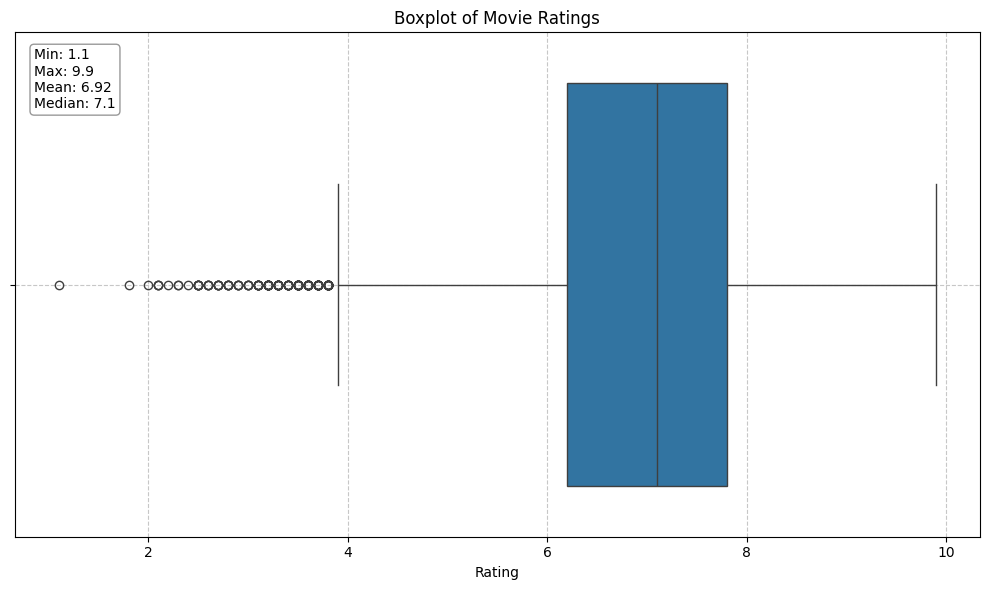

In [13]:
import seaborn as sns

import matplotlib.pyplot as plt

# Set up the figure size
plt.figure(figsize=(10, 6))

# Create boxplot for RATING column
sns.boxplot(x=df['RATING'])
plt.title('Boxplot of Movie Ratings')
plt.xlabel('Rating')
plt.grid(True, linestyle='--', alpha=0.7)

# Add some descriptive statistics
rating_stats = df['RATING'].describe()
plt.annotate(f"Min: {rating_stats['min']:.1f}\nMax: {rating_stats['max']:.1f}\n"
             f"Mean: {rating_stats['mean']:.2f}\nMedian: {rating_stats['50%']:.1f}",
             xy=(0.02, 0.85), xycoords='axes fraction', 
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

plt.tight_layout()
plt.show()

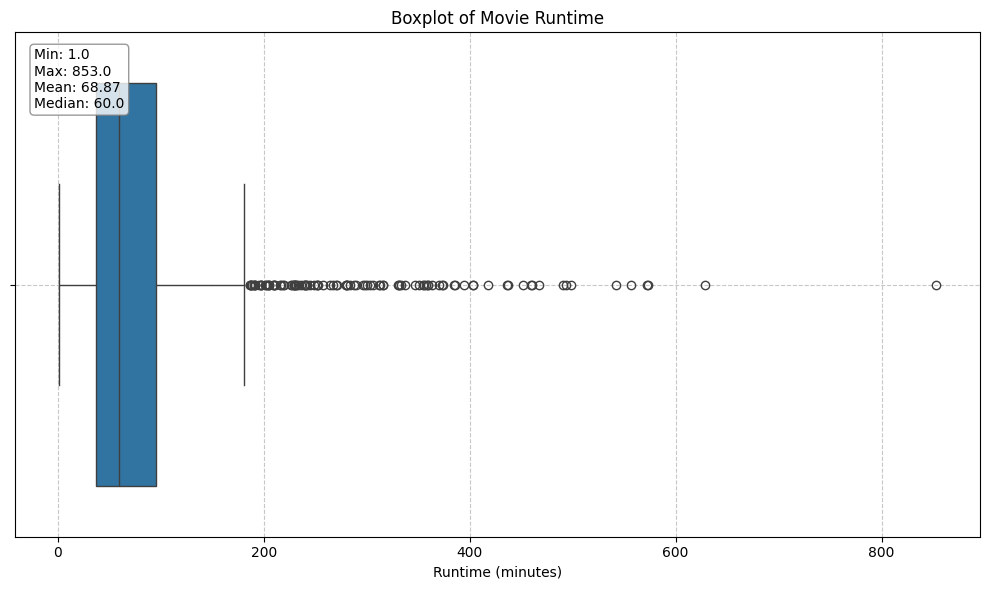

In [14]:
# Set up the figure size
plt.figure(figsize=(10, 6))

# Create boxplot for RunTime column
sns.boxplot(x=df['RunTime'])
plt.title('Boxplot of Movie Runtime')
plt.xlabel('Runtime (minutes)')
plt.grid(True, linestyle='--', alpha=0.7)

# Add descriptive statistics
runtime_stats = df['RunTime'].describe()
plt.annotate(f"Min: {runtime_stats['min']:.1f}\nMax: {runtime_stats['max']:.1f}\n"
             f"Mean: {runtime_stats['mean']:.2f}\nMedian: {runtime_stats['50%']:.1f}",
             xy=(0.02, 0.85), xycoords='axes fraction', 
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

plt.tight_layout()
plt.show()

Removed 2578 movies with runtime over 400 minutes


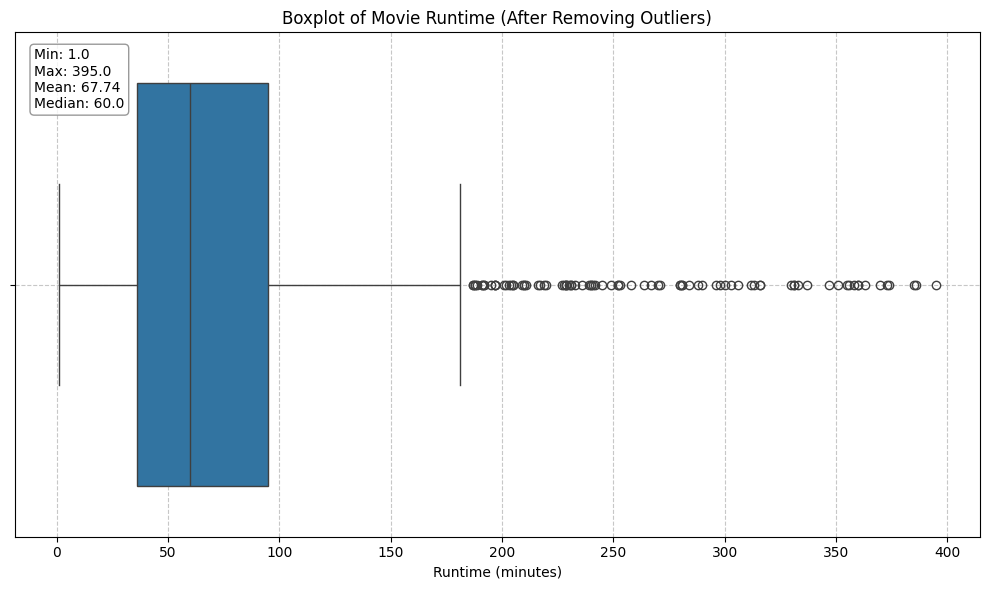

In [15]:
# Filter out runtime outliers (movies longer than 400 minutes)
df_filtered = df[df['RunTime'] <= 400]

# Create a new boxplot with filtered data
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_filtered['RunTime'])
plt.title('Boxplot of Movie Runtime (After Removing Outliers)')
plt.xlabel('Runtime (minutes)')
plt.grid(True, linestyle='--', alpha=0.7)

# Add descriptive statistics for filtered data
filtered_runtime_stats = df_filtered['RunTime'].describe()
plt.annotate(f"Min: {filtered_runtime_stats['min']:.1f}\nMax: {filtered_runtime_stats['max']:.1f}\n"
             f"Mean: {filtered_runtime_stats['mean']:.2f}\nMedian: {filtered_runtime_stats['50%']:.1f}",
             xy=(0.02, 0.85), xycoords='axes fraction', 
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

# Print the number of movies removed
removed_count = len(df) - len(df_filtered)
print(f"Removed {removed_count} movies with runtime over 400 minutes")

plt.tight_layout()
plt.show()

In [16]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6990 entries, 0 to 9976
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    6990 non-null   object 
 1   YEAR      6969 non-null   object 
 2   GENRE     6981 non-null   object 
 3   RATING    6768 non-null   float64
 4   ONE-LINE  6990 non-null   object 
 5   STARS     6990 non-null   object 
 6   VOTES     6768 non-null   float64
 7   RunTime   6990 non-null   float64
 8   Gross     0 non-null      float64
dtypes: float64(4), object(5)
memory usage: 546.1+ KB


In [18]:
df_filtered.isna().sum()

MOVIES         0
YEAR          21
GENRE          9
RATING       222
ONE-LINE       0
STARS          0
VOTES        222
RunTime        0
Gross       6990
dtype: int64

In [21]:


# Drop rows where YEAR or GENRE is null
df_filtered = df_filtered.dropna(subset=['YEAR', 'GENRE'])

df_filtered.isna().sum()

MOVIES         0
YEAR           0
GENRE          0
RATING       200
ONE-LINE       0
STARS          0
VOTES        200
RunTime        0
Gross       6961
dtype: int64

In [23]:
# Get the mean rating
mean_rating = df_filtered['RATING'].mean()
print(f"Mean rating for imputation: {mean_rating:.2f}")

# Impute missing ratings with the mean
df_filtered['RATING'] = df_filtered['RATING'].fillna(mean_rating)

Mean rating for imputation: 6.86


In [25]:
df_filtered.isna().sum()

MOVIES         0
YEAR           0
GENRE          0
RATING         0
ONE-LINE       0
STARS          0
VOTES        200
RunTime        0
Gross       6961
dtype: int64

In [27]:
df_filtered.to_csv("movies_cleaned.csv", index=False)